In [1]:
import sys
sys.path.append('../asp')

import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as nnF 
import torch.functional as ptF
import torch.optim as optim

import torchvision.transforms as xf
import torchvision.transforms.functional as tvF

import matplotlib.pyplot as plt

device = torch.device("cpu")
torch_dtype = torch.float64

print(torch.__version__) 
print(device)

%load_ext autoreload
%autoreload 2
%matplotlib notebook

1.9.0+cu102
cpu


In [2]:
#Defining Parameters

m = 1
cm = 10**-2
mm = 10**-3
um = 10**-6
nm = 10**-9



d2r = np.pi/180

#sizex = 500
#sizey = 500

multiply_factor = 1

l_x = 20 * mm * multiply_factor 
l_y = 20 * mm * multiply_factor

print(type(l_x))

dx = 295*um / 10 * multiply_factor
dy = 295*um / 10 * multiply_factor

sizex = int(l_x/dx)
sizey = int(l_y/dx)

print('dx:', dx/um, "um, dy:", dy/um, 'um')
print('Grid Size:', sizey, 'x', sizex)

refractive_index = 1.0
wavelength = 632.8 * nm

<class 'float'>
dx: 29.499999999999996 um, dy: 29.499999999999996 um
Grid Size: 677 x 677


Size of Field:  19.971499999999995 x 19.971499999999995 mm^2
Gaussian Spot Size:  0.3 mm and Rayleigh Length:  446.81311444861143 mm
Gaussian Spot Size:  0.3 mm and Rayleigh Length:  446.81311444861143 mm
Gaussian Spot Size:  0.3 mm and Rayleigh Length:  446.81311444861143 mm
Gaussian Spot Size:  0.3 mm and Rayleigh Length:  446.81311444861143 mm
Gaussian Spot Size:  0.3 mm and Rayleigh Length:  446.81311444861143 mm
Gaussian Spot Size:  0.3 mm and Rayleigh Length:  446.81311444861143 mm


<IPython.core.display.Javascript object>


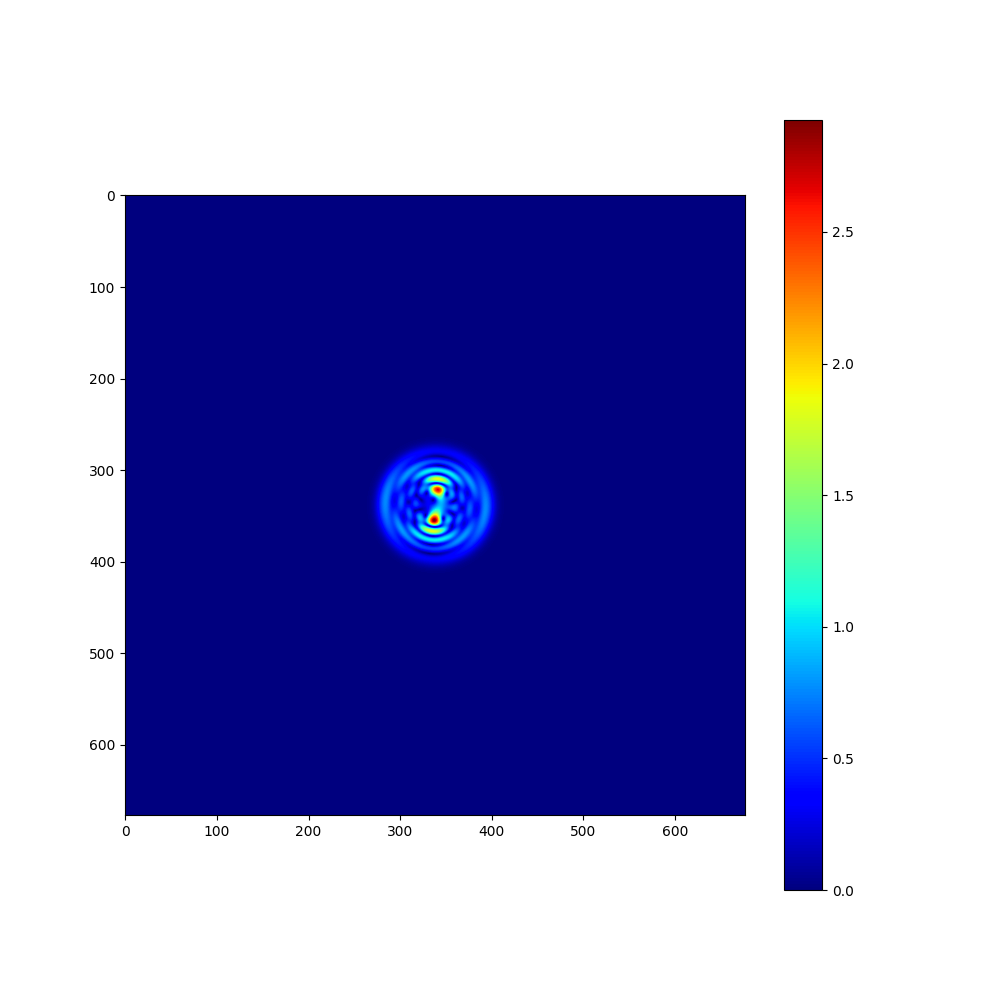

In [3]:
from angular_spectrum_prop import angular_spectrum

asp = angular_spectrum(dx=dx , dy=dy, 
                  refractive_index=refractive_index, wavelength=wavelength, 
                  sizex=sizex, sizey=sizey, device=device)


#Get a GL wave
U_gl = asp.GaussLaugerreWaveZ(w0=0.3*mm, A=1)

#propagate the wave a little bit, 
#change dz to see the effect of propagation of Double Helix PSF
U, H_0 = asp.propagateZ(U_gl,dz=500*mm)

plt.figure(figsize=[10,10])
plt.imshow(asp.abs(U), cmap='jet')
#plt.xlim([510,850])
#plt.ylim([510,850])
plt.colorbar()
#plt.savefig('Rotated_Amplitude_Images.png', dpi=120)